In [1]:
from nufeb_tools import utils,plot,spatial
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import KDTree
from scipy.spatial import Voronoi, voronoi_plot_2d
import skgeom as sg
from tqdm import tqdm

ModuleNotFoundError: No module named 'skgeom'

In [ ]:
x = utils.get_data(directory=r'E:\sucrose\runs\Run_50_50_1.00e+00_1_2022-01-11_48525')

In [3]:
metrics = spatial.fitness_metrics(x)
sorted = metrics.sort_values(by=['total biomass']).loc[metrics.type==2].reset_index(drop=True)

Assigning ancestry:   0%|          | 0/295 [00:00<?, ?it/s]C:\Users\Jonathan\anaconda3\envs\nufeb\lib\site-packages\nufeb_tools\utils.py:305: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  motherless = pd.merge(temp,ancestors,on='ID',how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1).drop('x_y',1).iloc[:,:4]
Assigning ancestry: 100%|██████████| 295/295 [00:35<00:00,  8.41it/s]
C:\Users\Jonathan\anaconda3\envs\nufeb\lib\site-packages\nufeb_tools\utils.py:311: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.join(ancestry_df.set_index(['ID']),on='ID',how='right', lsuffix='_left', rsuffix='').drop('mother_cell_left',1)
C:\Users\Jonathan\anaconda3\envs\nufeb\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

<AxesSubplot:xlabel='Timestep', ylabel='mother_cell'>

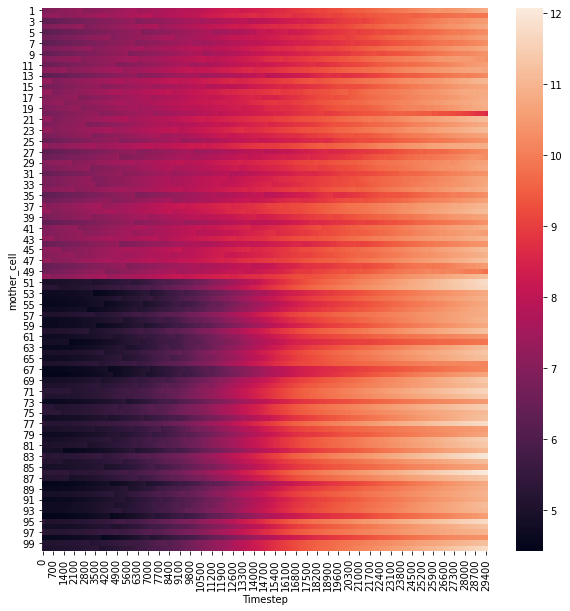

In [4]:
df = x.colonies.copy()
data = df.copy()
data['sum'] = df.groupby(['mother_cell','Timestep'])['biomass'].cumsum()
data['sum'] = np.log(data['sum'])
pivs = data.pivot_table(index='mother_cell', columns='Timestep', values='sum')
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivs,ax=ax)


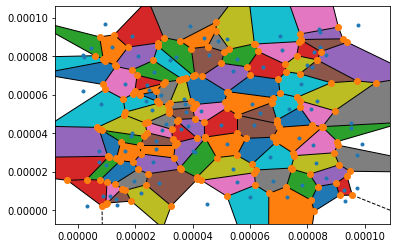

In [5]:

#df = low.colonies.copy()
df = df[(df.Timestep ==0)][['x','y']]
points = df.values
vor = Voronoi(points)


#ax.plot(points[:,0], points[:,1], 'ko')
#ax.axis('equal')
ax.set_xlim(0, 1e-4)
ax.set_ylim(0, 1e-4)


#plt.show()
voronoi_plot_2d(vor)
    # colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

In [19]:
areas = [abs(float(sg.Polygon(vor.vertices[vor.regions[i]]).area())) for i in range(len(vor.regions))]


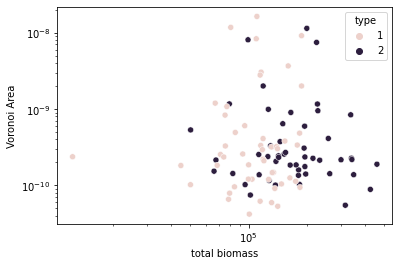

In [75]:
f, ax = plt.subplots()
sns.scatterplot(x='total biomass',y='Voronoi Area',hue='type',data=metrics,ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

In [21]:
df[['mother_cell','total_biomass']]

,mother_cell,total_biomass
0,81,202.939853
100,81,112.267356
239,81,112.286275
391,81,112.360043
544,81,112.489690
...,...,...
6034359,47,187669.654446
6034360,3,100920.394046
6034361,27,68870.114013
6034362,19,132515.505194


In [70]:
df = x.colonies.copy()
dfs = list()
for type_ in df.type.unique():
    IDs = df[(df.Timestep ==0) & (df.type == type_)][['mother_cell','type']]
    points = df[(df.Timestep ==0) & (df.type == type_)][['x','y']].values
    vor = Voronoi(points)
    areas = [abs(np.sum( [0.5, -0.5] * vor.vertices[vor.regions[i]] * np.roll( np.roll(vor.vertices[vor.regions[i]], 1, axis=0), 1, axis=1) )) for i in range(len(vor.regions))]
    IDs.loc[:,'Voronoi Area'] = areas[1:]
    dfs.append(IDs)
m2 = pd.concat(dfs)
temp = df.loc[df.Timestep==df.iloc[-1].Timestep,['ID','total_biomass']]
temp.columns = ['mother_cell','total_biomass']
m2=m2.merge(metrics[['mother_cell','total biomass']],on='mother_cell')

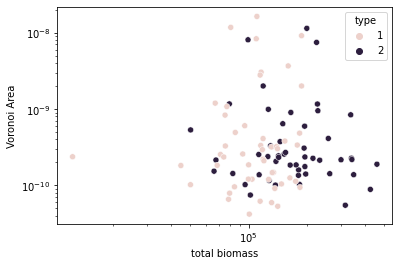

In [74]:
f, ax = plt.subplots()
sns.scatterplot(x='total biomass',y='Voronoi Area',hue='type',data=m2,ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

AttributeError: 'DataFrame' object has no attribute 'id'

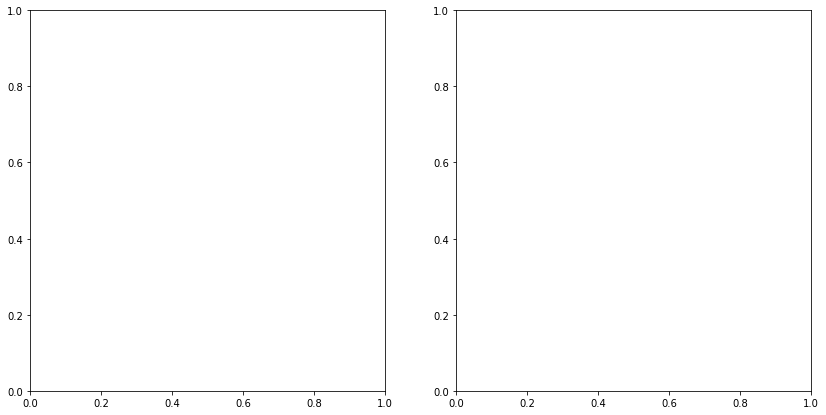

In [76]:
plot.growth_rate_mu(df)